# ART Boundary Attack

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import sys
!{sys.executable} -m pip install git+https://github.com/nottombrown/imagenet_stubs
sys.path.append("..")

%matplotlib inline

import imagenet_stubs
import numpy as np
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input
from matplotlib import pyplot as plt
from IPython.display import clear_output

from art.classifiers import KerasClassifier
from art.attacks import BoundaryAttack
from art.utils import to_categorical

Using TensorFlow backend.


# Model Definition

In [2]:
mean_imagenet = np.zeros([224, 150, 3])
mean_imagenet[...,0].fill(103.939)
mean_imagenet[...,1].fill(116.779)
mean_imagenet[...,2].fill(123.68)
model = ResNet50(weights='imagenet')
classifier = KerasClassifier(clip_values=(0, 255), model=model, preprocessing=(mean_imagenet, 1))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Get Target and Init Images

Target image is:  105


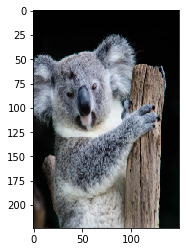

Init image is:  866


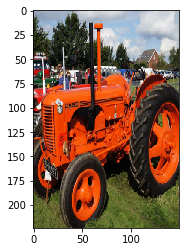

In [3]:
target_image_name = 'koala.jpg'
init_image_name = 'tractor.jpg'
for image_path in imagenet_stubs.get_image_paths():
    if image_path.endswith(target_image_name):
        target_image = image.load_img(image_path, target_size=(224, 150))
        target_image = image.img_to_array(target_image)
    if image_path.endswith(init_image_name):
        init_image = image.load_img(image_path, target_size=(224, 150))
        init_image = image.img_to_array(init_image)

print("Target image is: ", np.argmax(classifier.predict(np.array([target_image]))[0]))
plt.imshow(target_image.astype(np.uint))
plt.show()
print("Init image is: ", np.argmax(classifier.predict(np.array([init_image]))[0]))
plt.imshow(init_image.astype(np.uint))
plt.show()

# Boundary Untargeted Attack

Adversarial image at step 0. L2 error 35219.73 and class label 109.


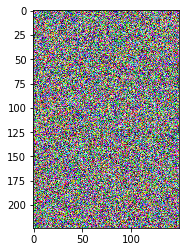

Adversarial image at step 100. L2 error 13664.706 and class label 109.


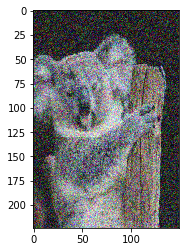

Adversarial image at step 200. L2 error 9237.496 and class label 109.


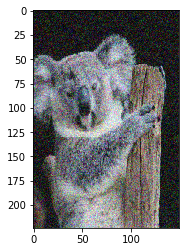

Adversarial image at step 300. L2 error 7345.0234 and class label 109.


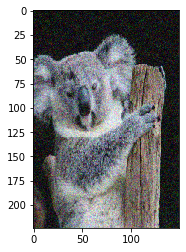

Adversarial image at step 400. L2 error 5885.7007 and class label 109.


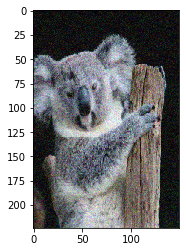

Adversarial image at step 500. L2 error 5208.741 and class label 109.


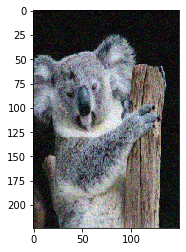

Adversarial image at step 600. L2 error 4671.1045 and class label 109.


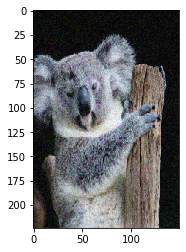

Adversarial image at step 700. L2 error 4482.637 and class label 109.


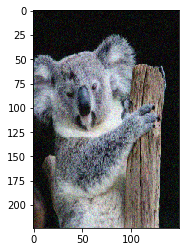

Adversarial image at step 800. L2 error 3946.5105 and class label 109.


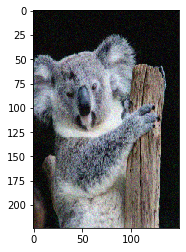

Adversarial image at step 900. L2 error 3633.6367 and class label 109.


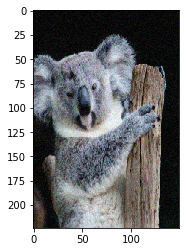

Adversarial image at step 1000. L2 error 3720.0225 and class label 109.


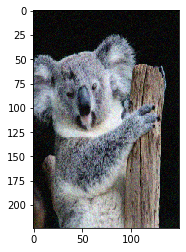

Adversarial image at step 1100. L2 error 3488.1401 and class label 109.


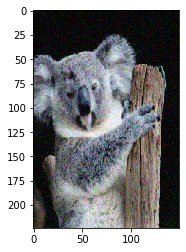

Adversarial image at step 1200. L2 error 3181.4146 and class label 109.


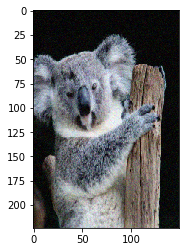

Adversarial image at step 1300. L2 error 3061.7922 and class label 109.


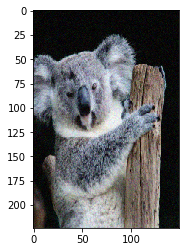

Adversarial image at step 1400. L2 error 2928.41 and class label 109.


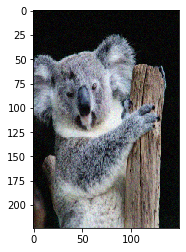

Adversarial image at step 1500. L2 error 2822.2812 and class label 109.


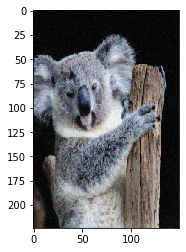

Adversarial image at step 1600. L2 error 2725.1946 and class label 109.


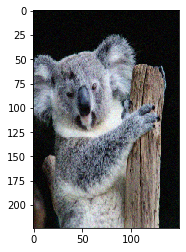

Adversarial image at step 1700. L2 error 2672.2817 and class label 109.


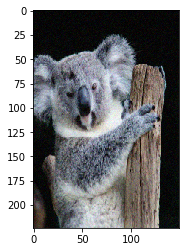

Adversarial image at step 1800. L2 error 2774.8608 and class label 109.


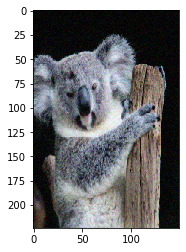

Adversarial image at step 1900. L2 error 2642.2917 and class label 109.


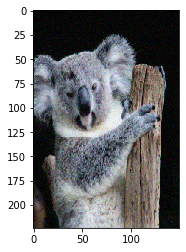

In [4]:
attack = BoundaryAttack(classifier=classifier, targeted=False, max_iter=0, delta=0.0001, epsilon=0.0001)
iter_step = 100
x_adv = None
for i in range(20):
    x_adv = attack.generate(x=np.array([target_image]), x_adv_init=x_adv)

    print("Adversarial image at step %d." % (i * iter_step), "L2 error", 
          np.linalg.norm(np.reshape(x_adv[0] - target_image, [-1])),
          "and class label %d." % np.argmax(classifier.predict(x_adv)[0]))
    plt.imshow(x_adv[0].astype(np.uint))
    plt.show(block=False)
    
    if hasattr(attack, 'curr_delta') and hasattr(attack, 'curr_epsilon'):
        attack.max_iter = iter_step 
        attack.delta = attack.curr_delta
        attack.epsilon = attack.curr_epsilon
    else:
        break

# Boundary Targeted Attack

Adversarial image at step 0. L2 error 36283.465 and class label 866.


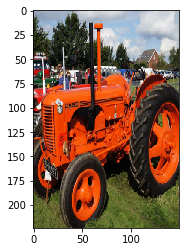

Adversarial image at step 100. L2 error 15823.567 and class label 866.


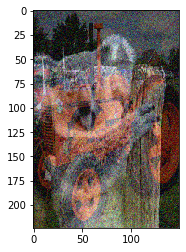

Adversarial image at step 200. L2 error 12402.088 and class label 866.


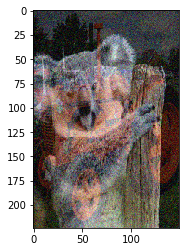

Adversarial image at step 300. L2 error 9969.137 and class label 866.


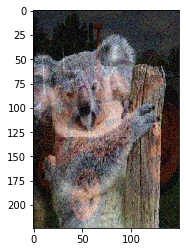

Adversarial image at step 400. L2 error 8481.322 and class label 866.


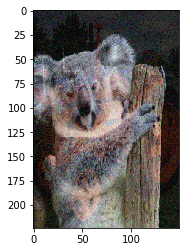

Adversarial image at step 500. L2 error 7399.9834 and class label 866.


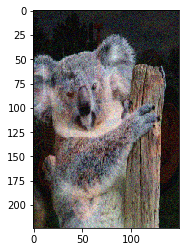

Adversarial image at step 600. L2 error 6461.952 and class label 866.


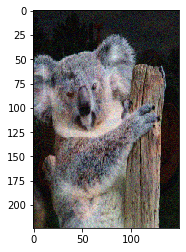

Adversarial image at step 700. L2 error 5821.326 and class label 866.


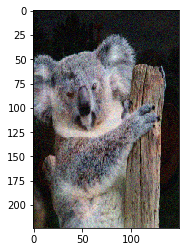

Adversarial image at step 800. L2 error 5202.297 and class label 866.


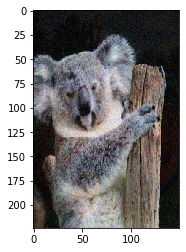

Adversarial image at step 900. L2 error 4731.6313 and class label 866.


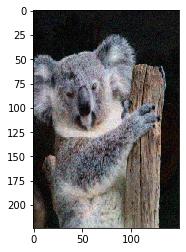

Adversarial image at step 1000. L2 error 4316.4814 and class label 866.


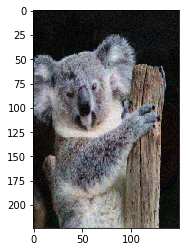

Adversarial image at step 1100. L2 error 3994.2969 and class label 866.


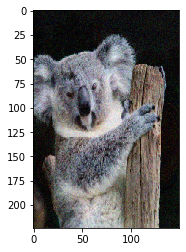

Adversarial image at step 1200. L2 error 3596.655 and class label 866.


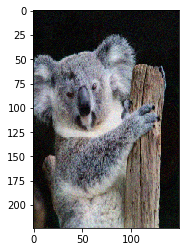

Adversarial image at step 1300. L2 error 3375.1355 and class label 866.


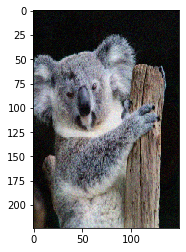

Adversarial image at step 1400. L2 error 3178.93 and class label 866.


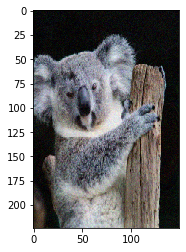

Adversarial image at step 1500. L2 error 3033.8005 and class label 866.


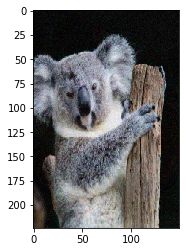

Adversarial image at step 1600. L2 error 2889.9343 and class label 866.


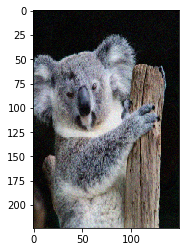

Adversarial image at step 1700. L2 error 2739.9993 and class label 866.


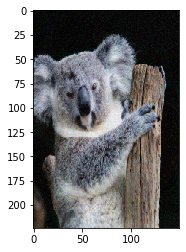

Adversarial image at step 1800. L2 error 2640.1873 and class label 866.


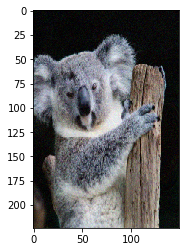

Adversarial image at step 1900. L2 error 2522.3635 and class label 866.


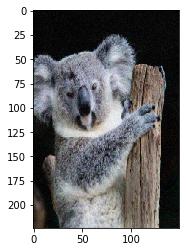

In [5]:
attack = BoundaryAttack(classifier=classifier, targeted=True, max_iter=0, delta=0.001, epsilon=0.001)
iter_step = 100
x_adv = np.array([init_image])
for i in range(20):
    x_adv = attack.generate(x=np.array([target_image]), y=to_categorical([866], 1000), x_adv_init=x_adv)

    print("Adversarial image at step %d." % (i * iter_step), "L2 error", 
          np.linalg.norm(np.reshape(x_adv[0] - target_image, [-1])),
          "and class label %d." % np.argmax(classifier.predict(x_adv)[0]))
    plt.imshow(x_adv[0].astype(np.uint))
    plt.show(block=False)
    
    if hasattr(attack, 'curr_delta') and hasattr(attack, 'curr_epsilon'):
        attack.max_iter = iter_step 
        attack.delta = attack.curr_delta
        attack.epsilon = attack.curr_epsilon
    else:
        break